In [2]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [2]:
df = pd.read_csv('full_df.csv')

In [3]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [4]:
import ast


labels_order = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
df['labels'] = df['labels'].str.extract(r"\['([A-Z])'\]")
df['target'] = df['target'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['target_index'] = df['target'].apply(lambda x: x.index(1))

# Map the expected label based on that index
df['expected_label'] = df['target_index'].apply(lambda i: labels_order[i])

# Check if label matches the expected label
df['match'] = df['labels'] == df['expected_label']



In [5]:
#check for null values
df.isnull().any()

ID                           False
Patient Age                  False
Patient Sex                  False
Left-Fundus                  False
Right-Fundus                 False
Left-Diagnostic Keywords     False
Right-Diagnostic Keywords    False
N                            False
D                            False
G                            False
C                            False
A                            False
H                            False
M                            False
O                            False
filepath                     False
labels                       False
target                       False
filename                     False
target_index                 False
expected_label               False
match                        False
dtype: bool

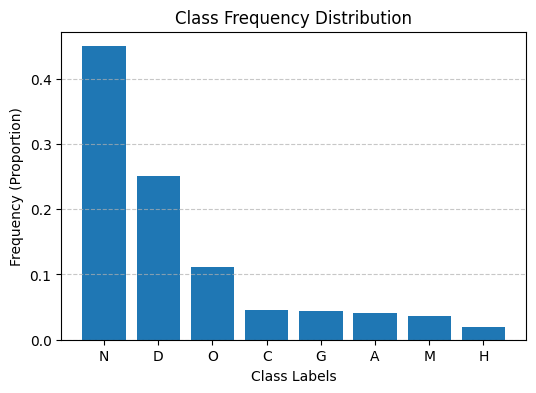

In [6]:
#we want to check the distribution of the classes to see whether the classes are similar in size or not
import matplotlib.pyplot as plt

# Calculate normalized frequencies
freq = df['labels'].value_counts() / len(df)

# Create a simple bar plot
plt.figure(figsize=(6,4))
plt.bar(freq.index, freq.values)

# Add labels and title
plt.xlabel('Class Labels')
plt.ylabel('Frequency (Proportion)')
plt.title('Class Frequency Distribution')

# Show grid and plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy_score(y_pred, y_test)

### Image Processing

In [7]:
from PIL import Image
img = Image.open("preprocessed_images/0_left.jpg")
img.show()

In [14]:
from PIL import Image
import numpy as np
import os

folder_path = "preprocessed_images"

vectors = []

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    img = Image.open(file_path)
    print("Loaded:", img.mode, img.size)

    img = img.convert("RGB")
    arr = np.array(img)
    vectors.append(arr.flatten())

#print("Array shape:", arr.shape)
#print("Array min/max:", arr.min(), arr.max())


Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB (512, 512)
Loaded: RGB

In [16]:
df['vectors'] = vectors
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,M,O,filepath,labels,target,filename,target_index,expected_label,match,vectors
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,N,"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,0,N,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,N,"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,0,N,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,1,../input/ocular-disease-recognition-odir5k/ODI...,D,"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,1,D,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,1,../input/ocular-disease-recognition-odir5k/ODI...,D,"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,1,D,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,D,"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,1,D,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,D,"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,1,D,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,D,"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,1,D,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,D,"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,1,D,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,D,"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,1,D,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
